In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_with_diff as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

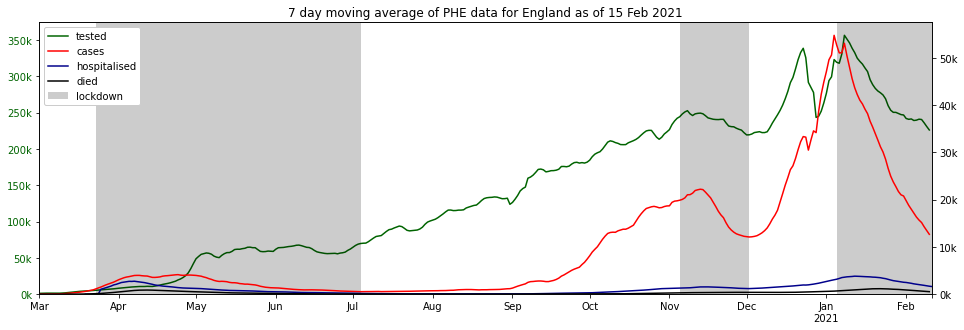

In [23]:
plot_summary(earliest_date='2020-03-01')

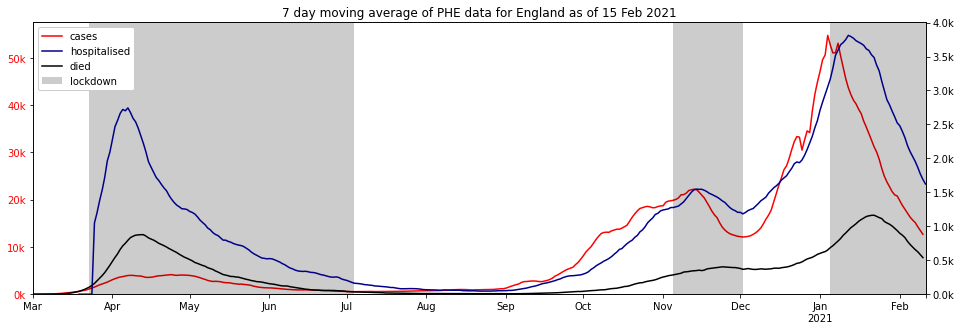

In [24]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,490722.0,12862909.0,12372187.0,56286961,0.871822,21.980556,77.147622
1,Northern Ireland,N92000002,29005.0,397243.0,368238.0,1893667,1.531684,19.445763,79.022553
2,Scotland,S92000003,14501.0,1255190.0,1240689.0,5463300,0.265426,22.709516,77.025058
3,Wales,W92000004,5402.0,784809.0,779407.0,3152879,0.171335,24.720486,75.108179


'partial: 15,300,151'

'full: 539,630'

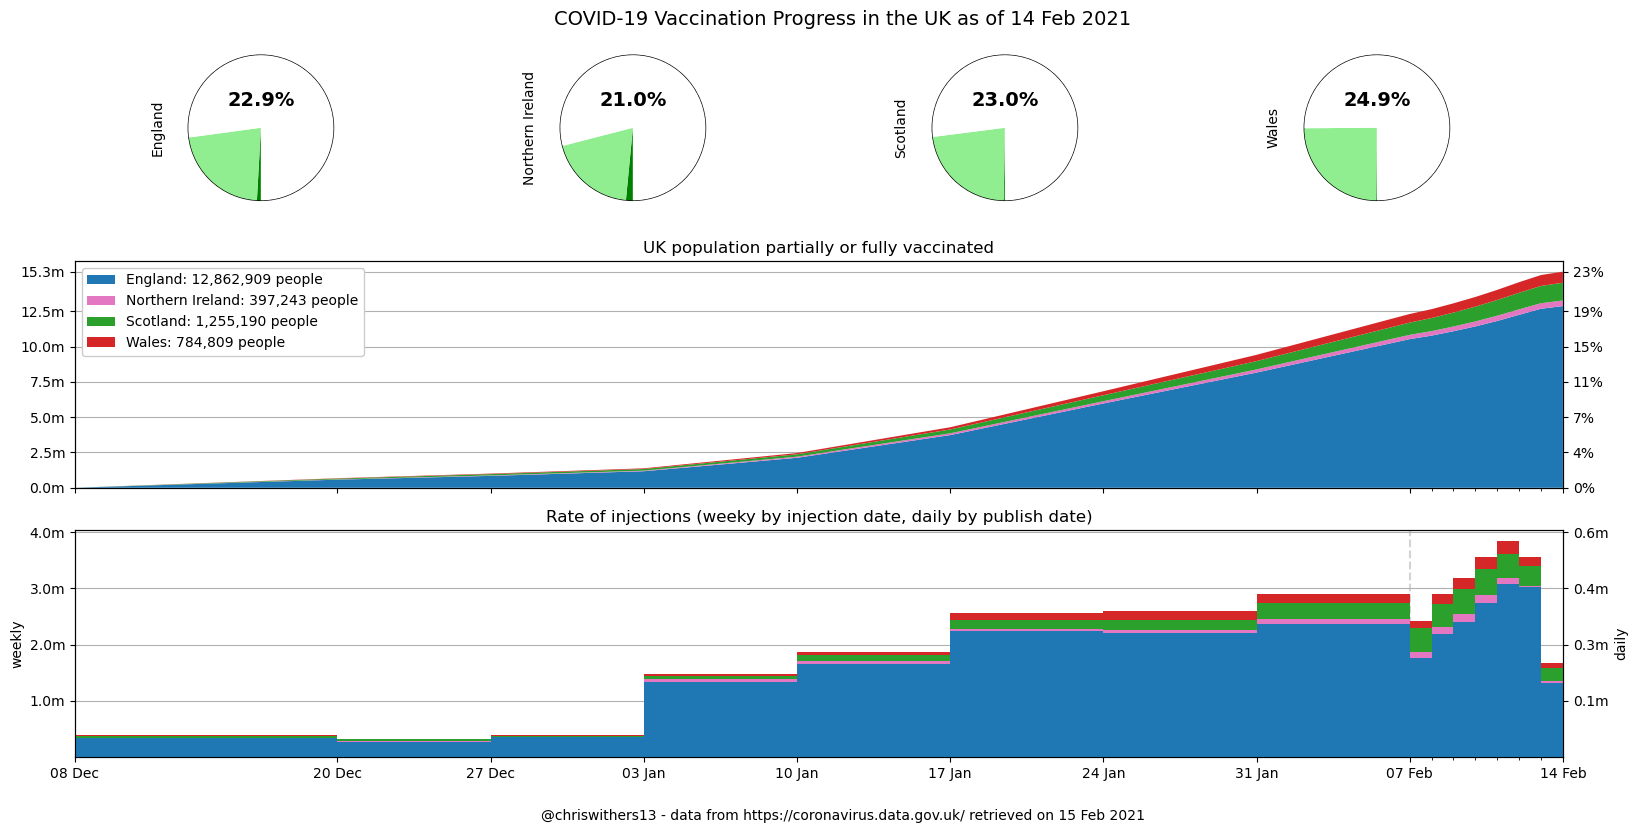

In [25]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [26]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,14 Feb 21,"+187,246",+837,+837,"+12,862,909","+490,722","+490,722"
Northern Ireland,14 Feb 21,"+6,142",+29,+29,"+397,243","+29,005","+29,005"
Scotland,14 Feb 21,"+31,416",+220,+220,"+1,255,190","+14,501","+14,501"
Wales,14 Feb 21,"+13,158",+829,+829,"+784,809","+5,402","+5,402"


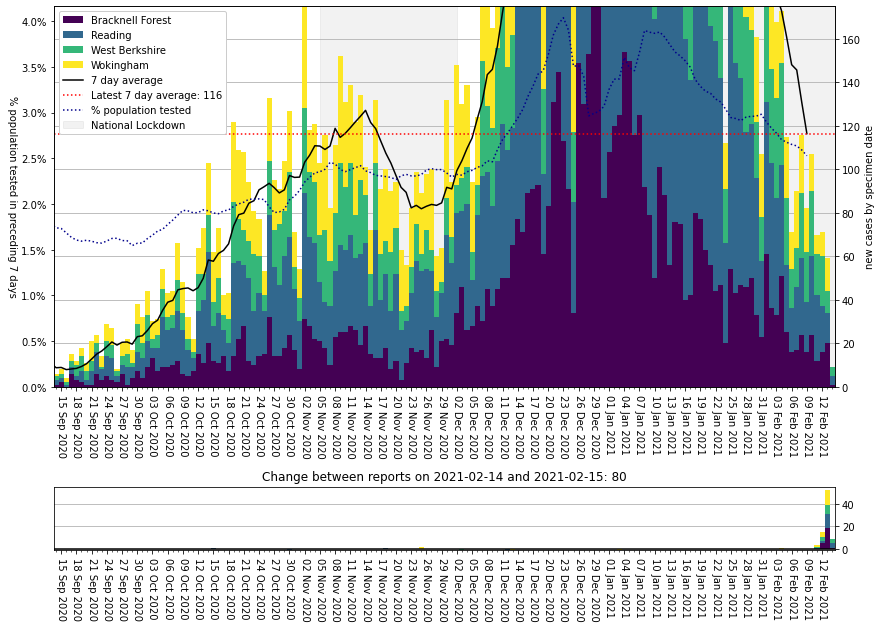

In [27]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

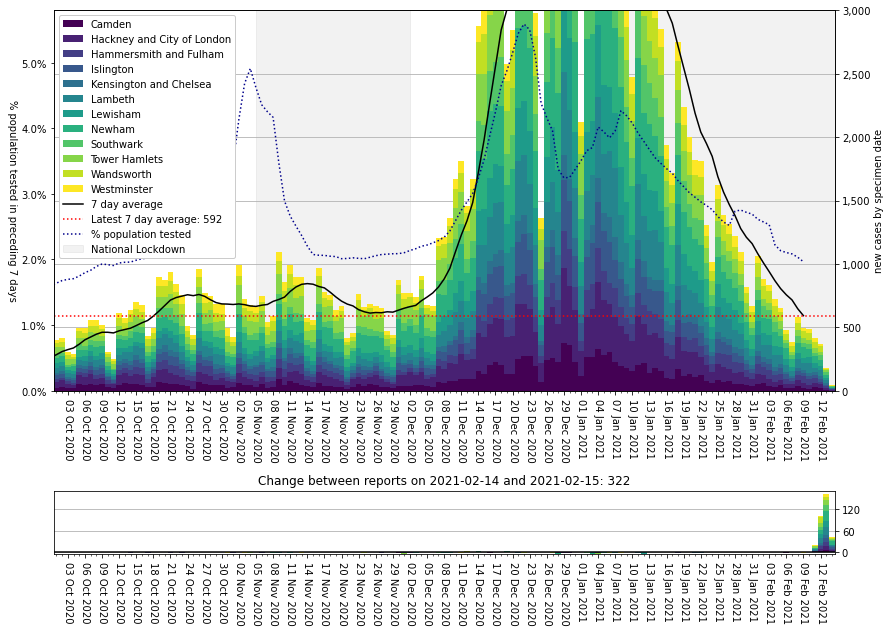

In [28]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [29]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [30]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000008,East Ayrshire,293.418572,358.0,2021-02-14
E07000150,Corby,270.015786,195.0,2021-02-14
E06000002,Middlesbrough,258.192651,364.0,2021-02-14
E08000028,Sandwell,239.001370,785.0,2021-02-14
E08000013,St. Helens,238.668771,431.0,2021-02-14
E07000170,Ashfield,237.652246,304.0,2021-02-14
E06000016,Leicester,229.233479,812.0,2021-02-14
E06000031,Peterborough,225.947918,457.0,2021-02-14
E08000011,Knowsley,224.045817,338.0,2021-02-14


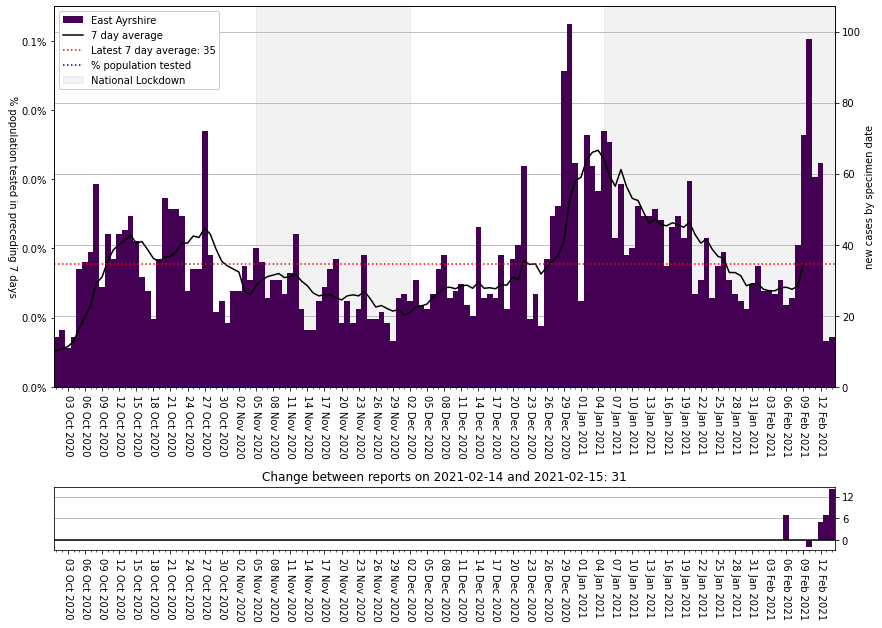

In [31]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [32]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,177.173905,2023.0,2021-02-14
E08000035,Leeds,135.663484,1076.0,2021-02-14
E08000032,Bradford,170.996858,923.0,2021-02-14
E08000003,Manchester,162.609567,899.0,2021-02-14
E08000012,Liverpool,168.660474,840.0,2021-02-14
E06000016,Leicester,229.233479,812.0,2021-02-14
E08000028,Sandwell,239.001370,785.0,2021-02-14
E06000047,County Durham,147.709651,783.0,2021-02-14
S12000049,Glasgow City,117.671216,745.0,2021-02-14


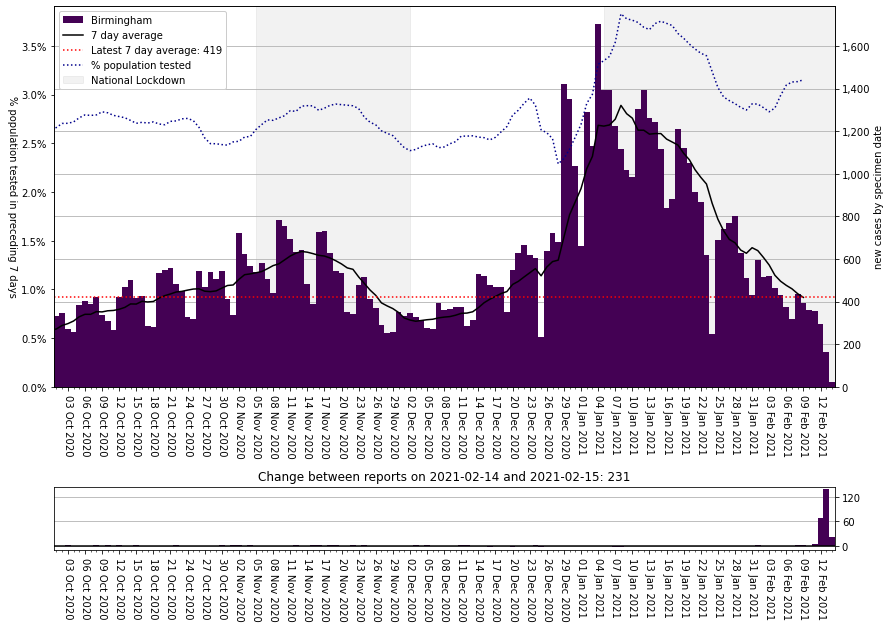

In [33]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [34]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

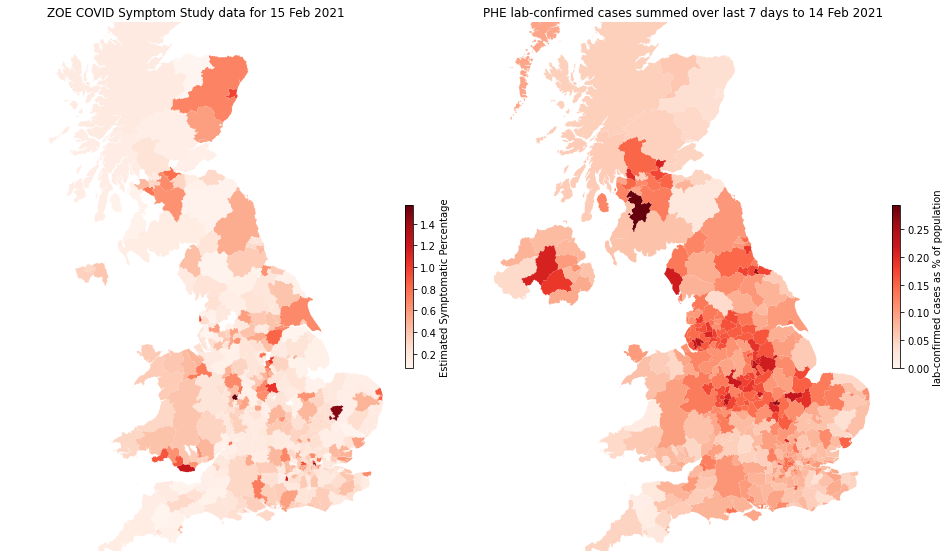

In [35]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [36]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

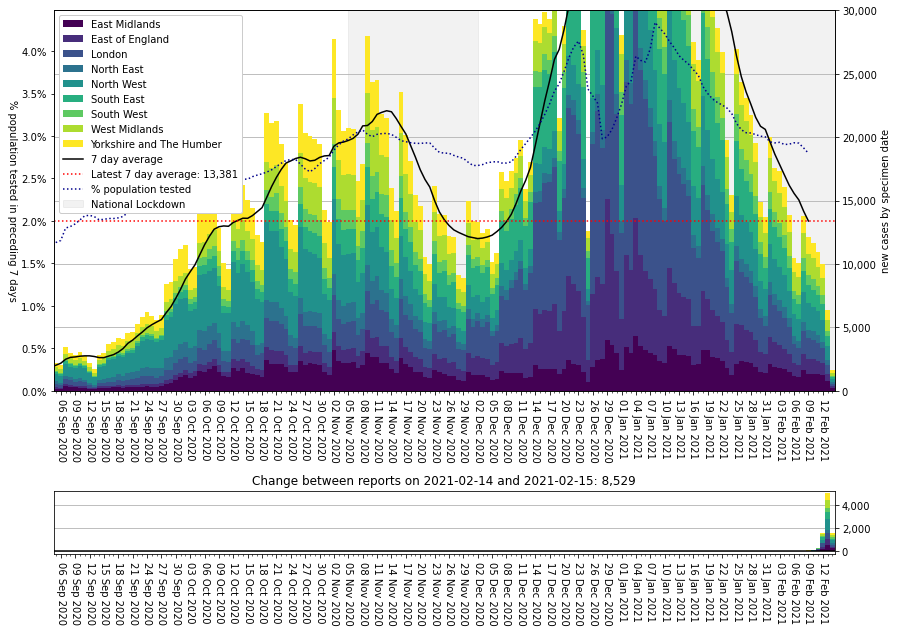

In [37]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

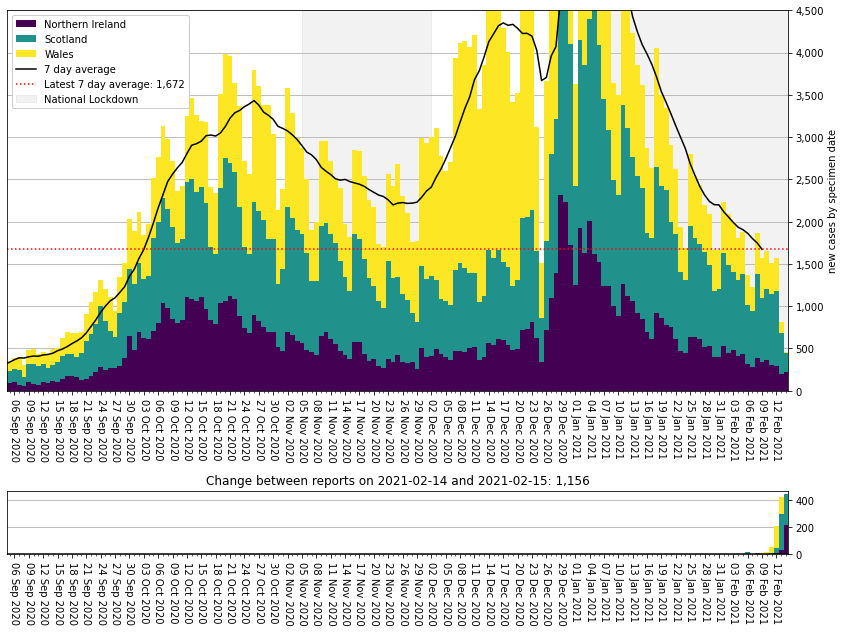

In [38]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')